**OBJECTIVE**

**The project aims to develop a machine learning model for accurately predicting crop yields using a dataset containing columns such as Area, Item, Year, Yield (hg/ha), Average Rainfall (mm/year), Pesticides (tonnes), and Average Temperature. This model will help farmers and agricultural stakeholders make data-driven decisions, optimize crop management practices, enhance productivity, and ensure food security..**

**Dataset Columns and Their Meanings**

1. *Area*: The geographical region or location where the crops are grown.
2. *Item*: The specific type of crop being analyzed.
3. *Year*: The year in which the data was recorded.
4. *Yield* (hg/ha): The crop yield measured in hectograms per hectare.
5 .*Average Rainfall (mm/year)*: The average annual rainfall in millimeters for the given area.
6. *Pesticides (tonnes)*: The amount of pesticides used in tonnes.
7.*Average Temperature*: The average temperature in the given area for the specified year.


Dataset URL :https://raw.githubusercontent.com/611noorsaeed/Crop-Yield-Prediction-Using-Machin-Learning-Python/main/yield_df.csv

**Importing libraries like Numpy, Pandas, Matplotlib, Seaborn and scikit learn(Sklearn)**

In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting graphs
import warnings  #handling the warnings
warnings.filterwarnings('ignore')  #suppress all warnings 

**Loading The Dataset**

In [106]:
df = pd.read_csv('yield_df.csv')

**Exploratory Data Analysis**

In [108]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [110]:
# Drop the column 'Unnamed: 0' from the DataFrame and make the change in place
df.drop('Unnamed: 0',axis=1,inplace=True)

In [112]:
#No. of rows and columns 
df.shape

(28242, 7)

No. of rows = 28242

No of Columns = 7

In [115]:
# Display a concise summary of the DataFrame, including the index range, column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [117]:
#check and count null values
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [119]:
#Check and count the number of duplicated entries
df.duplicated().sum()

2310

In [121]:
# Remove duplicate rows from the DataFrame and make the change in place
df.drop_duplicates(inplace=True)

In [123]:
# Check again for duplicate rows in the DataFrame after dropping duplicates to ensure no duplicates remain
df.duplicated().sum()

0

# Transforming average_rain_fall_mm_per_year
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [126]:
# Function to check if the input is a string
def isStr(obj):
    try:
        float(obj)     # convert the object to float
        return False   # If conversion is successful, it's not a string
    except:
        return True    # If conversion fails, it is a string

# Identify the indices of rows where 'average_rain_fall_mm_per_year' contains non-numeric values
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [128]:
# Drop rows from the DataFrame that contain non-numeric values in 'average_rain_fall_mm_per_year'
df = df.drop(to_drop)

In [130]:
# Display the current state of the DataFrame after cleaning and removing non-numeric entries
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [132]:
# Convert the column to float64 data type
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

# Graph Frequency vs Area

In [135]:
# Get the number of unique areas in the 'Area' column
len(df['Area'].unique())

101

There are **101** unique entries in the 'Area' column.

This helps in understanding the diversity of areas present in the dataset and can be useful for plotting the frequency of occurrences of each area in relation to the data being analyzed. Knowing the number of unique areas is also important for determining how to visualize the data effectively, particularly when creating a graph for frequency versus area.

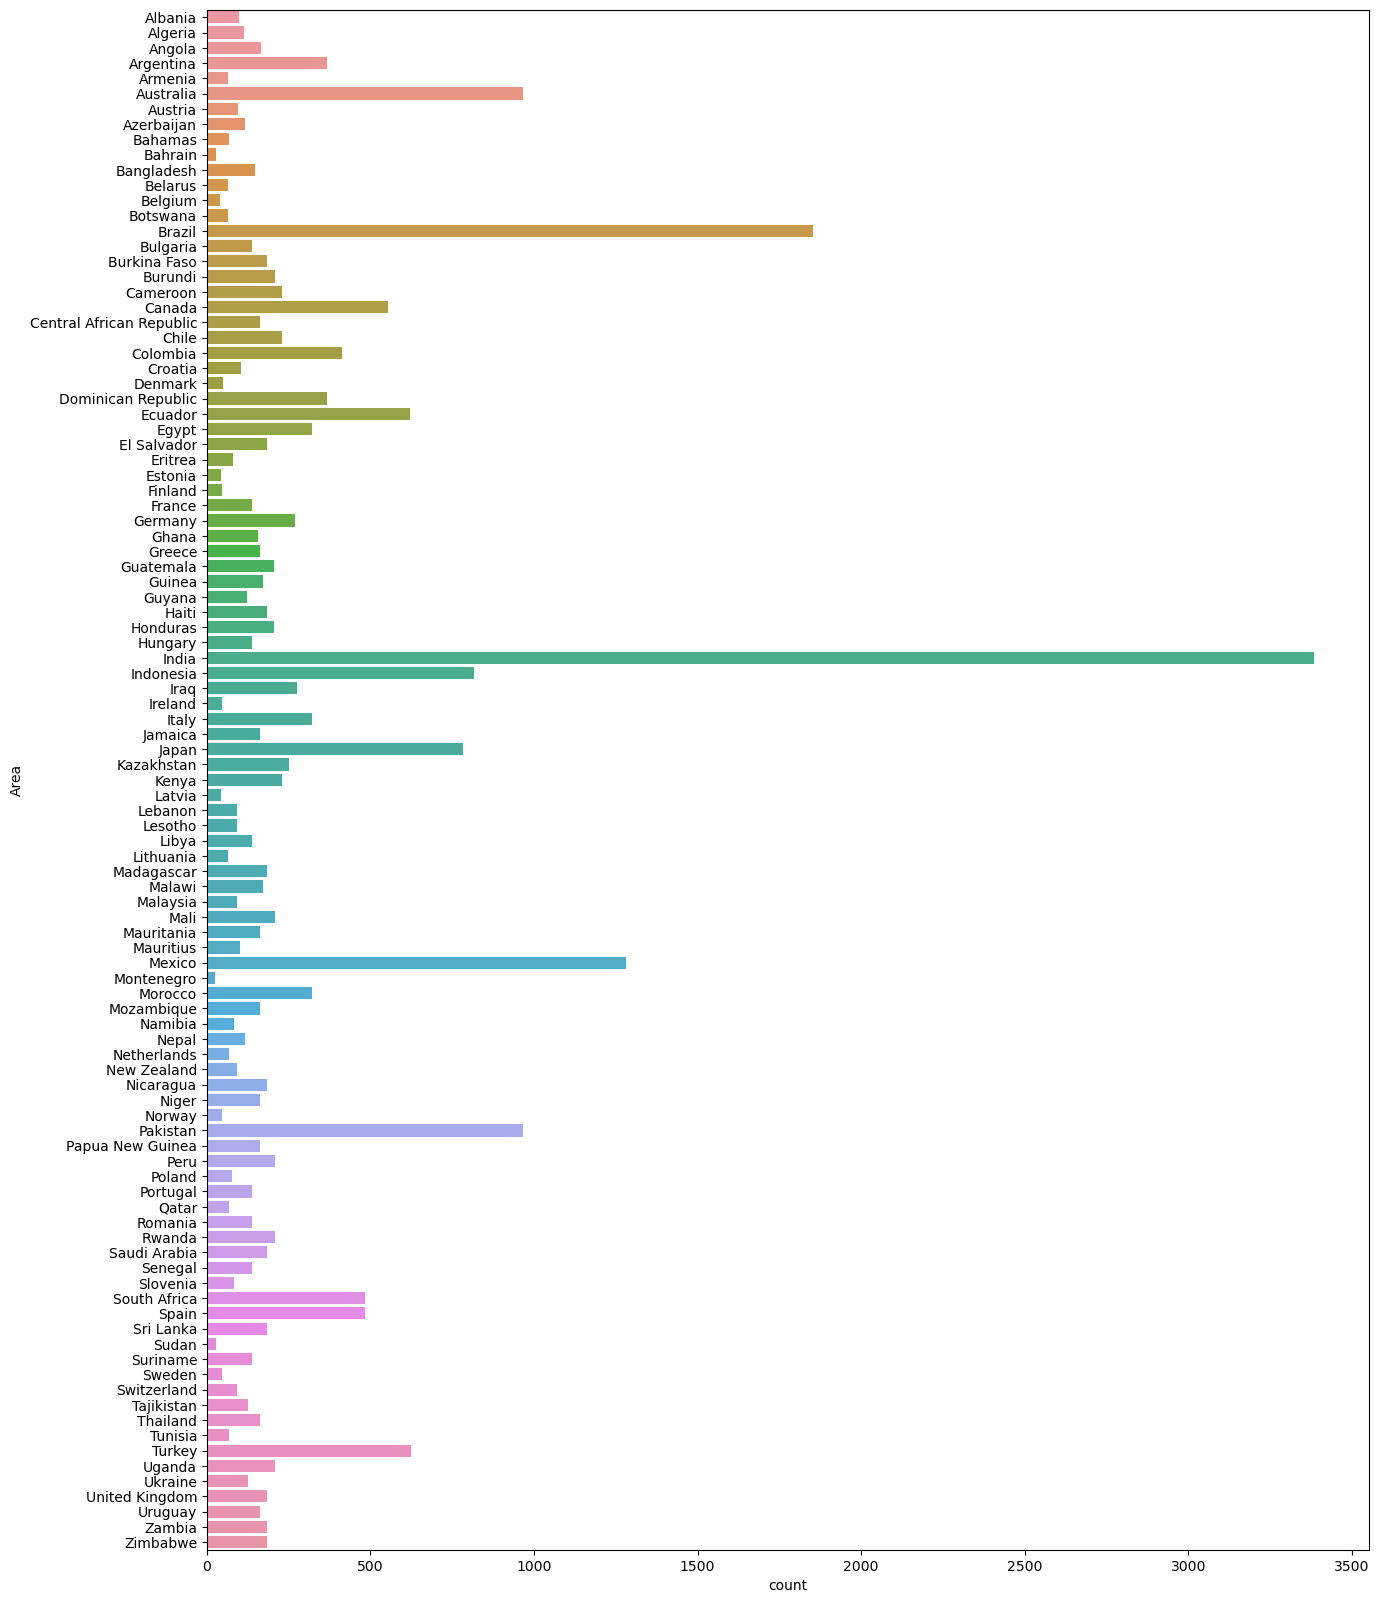

In [138]:
# Set the figure size for the plot
plt.figure(figsize=(15,20))

# Create a count plot to visualize the frequency of each area in the 'Area' column
sns.countplot(y=df['Area'])

# Display the plot
plt.show()

**Bar Chart**

**Y-axis:** Each unique area from the *'Area'* column will be listed 

**X-axis:** The *'Count'* of occurrences for each area will be represented 

**Observation:**

**Most Frequent Area:** The count plot reveals that **"India"** has the longest extended bar, indicating it has the highest frequency of occurrences in the dataset compared to other areas. This suggests that the data is predominantly associated with "India," and further analysis could explore why this is the case—whether it relates to the quantity of data collected from this area, the nature of the data, or other factors.



In [141]:
# Count how many unique areas have less than 500 occurrences in the 'Area' column
(df['Area'].value_counts() < 500).sum()

91

There are **91** unique areasv in dataset that have fewer than 500 occurrences.

This suggests that a significant portion of the data is concentrated in a relatively small number of areas, while many areas have limited representation.

# yield_per_country

In [145]:
# Get a list of unique countries/areas from the 'Area' column
country = df['Area'].unique()

# Initialize an empty list to store the total yield per country
yield_per_country = []

# Iterate through each unique area to calculate the total yield
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum()) # Sum the yields for the current area and append to the list


In [147]:
# Calculate the total yield across all entries in the 'hg/ha_yield' column
df['hg/ha_yield'].sum()

1996196943

**Observation:**

**Total Yield:** The total yield across all entries in the dataset is **1,996,196,943 hg/ha**. This figure represents the cumulative yield for all areas included in the analysis.

In [150]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

**Total Yield per Area:** The variable yield_per_country contains a *list* of total yields for each unique area in the dataset, calculated earlier by summing the 'hg/ha_yield' values for each area. Displaying this list provides insights into how yield varies across different areas.

# Yield Per Country Graph

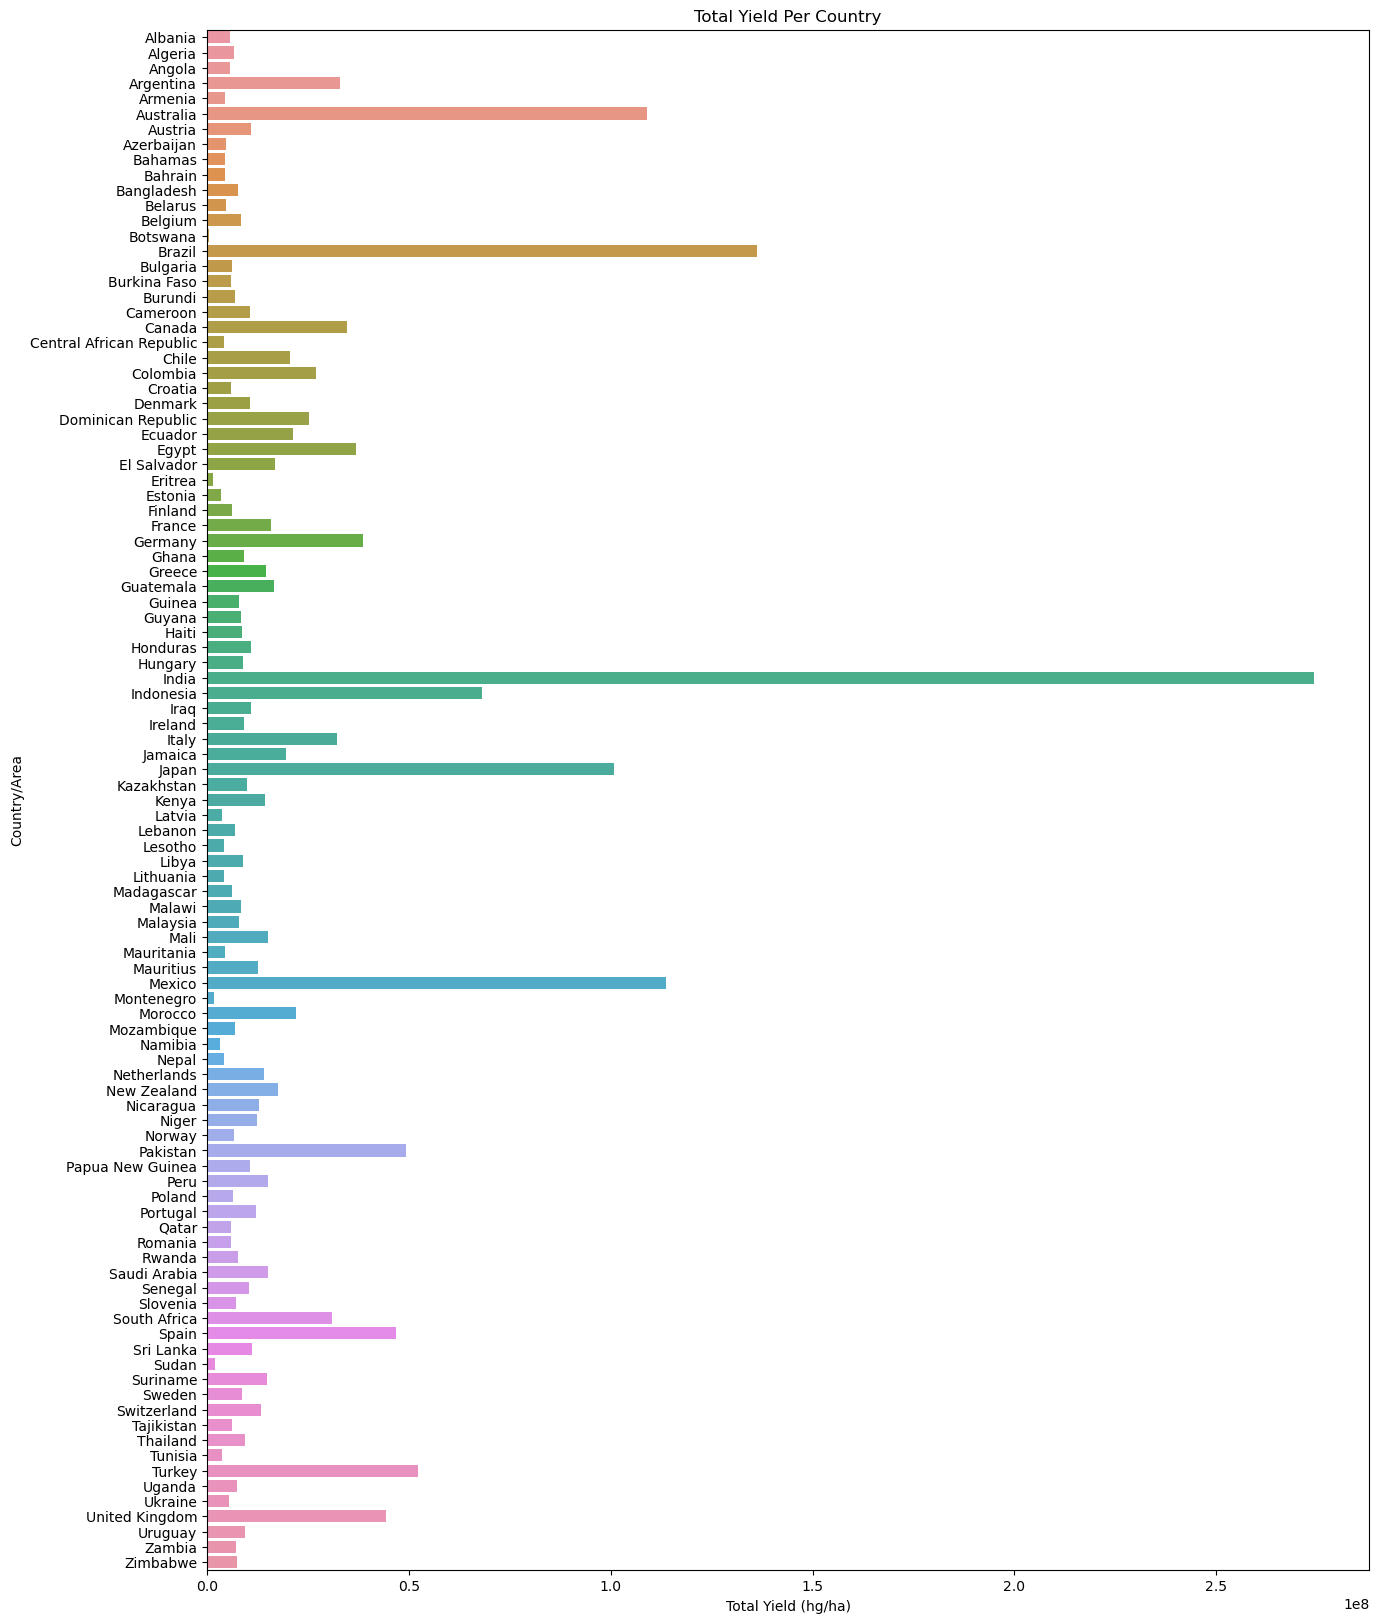

In [154]:
# Set the size of the figure for the plot
plt.figure(figsize=(15, 20))

# Create a horizontal bar plot for total yield per country using seaborn
sns.barplot(y=country, x=yield_per_country)

# Set labels for the axes
plt.xlabel('Total Yield (hg/ha)')
plt.ylabel('Country/Area')

# Set the title of the plot
plt.title('Total Yield Per Country')

# Display the plot
plt.show()

**Dominant Yield:** The bar plot indicates that "India" has the longest bar, signifying it has the highest total yield among all the countries or areas represented in the dataset. This suggests that a substantial portion of the total agricultural output in the dataset is attributed to India.

# Graph Frequency vs Item

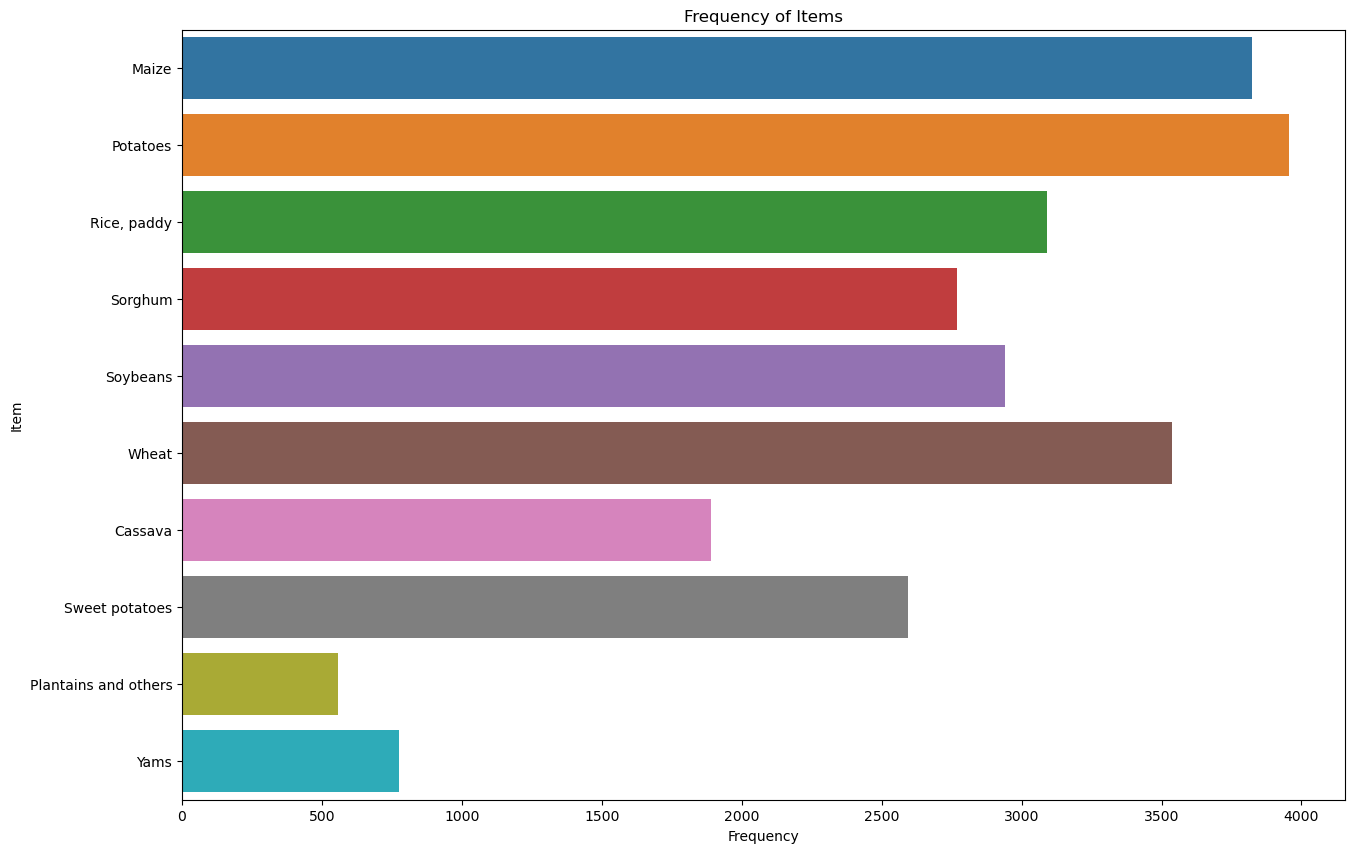

In [158]:
# Create a horizontal count plot for the 'Item' column using seaborn
plt.figure(figsize=(15, 10))  # Set the size of the figure for better visualization
sns.countplot(y=df['Item'])

# Set labels for the axes
plt.xlabel('Frequency')
plt.ylabel('Item')

# Set the title of the plot
plt.title('Frequency of Items')

# Display the plot
plt.show()

**Observation:**

The frequency analysis indicates that potatoes are the most prevalent item in the dataset, as reflected by the longest bar in the count plot. In contrast, plantains and other items are underrepresented, suggesting a potential focus on potato production within the agricultural landscape represented in this data.

# Yield Vs Item

In [162]:
# Get a list of unique crops from the 'Item' column
crops = df['Item'].unique()

# Initialize an empty list to store the total yield per crop
yield_per_crop = []

# Iterate through each unique crop to calculate the total yield
for crop in crops:
    # Sum the yields for the current crop and append to the list
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())


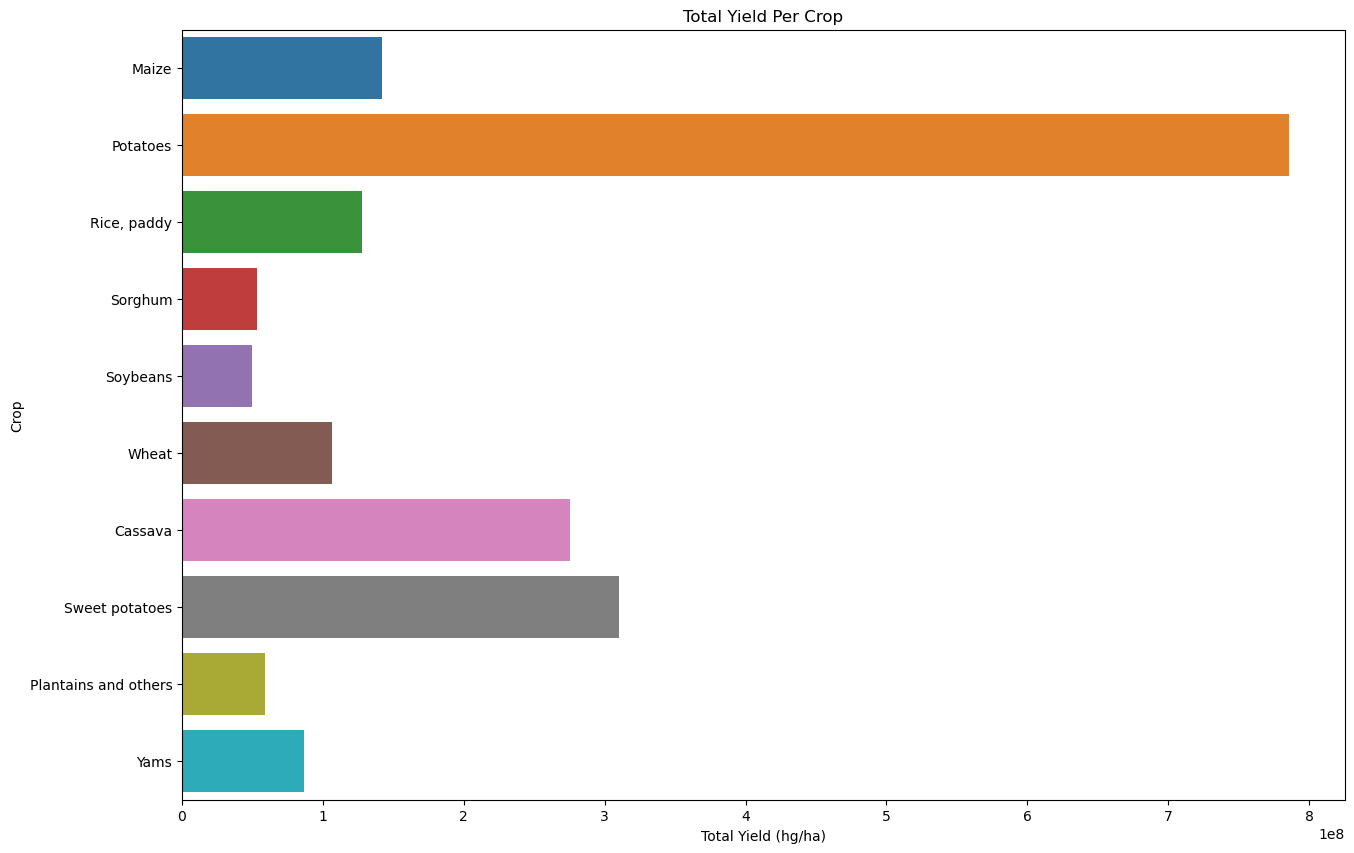

In [164]:
# Set the size of the figure for the plot
plt.figure(figsize=(15, 10))

# Create a horizontal bar plot for total yield per crop using seaborn
sns.barplot(y=crops, x=yield_per_crop)

# Set labels for the axes
plt.xlabel('Total Yield (hg/ha)')
plt.ylabel('Crop')

# Set the title of the plot
plt.title('Total Yield Per Crop')

# Display the plot
plt.show()


**Observation:**

The yield analysis reveals that potatoes have the highest total yield in the dataset, underscoring their importance in agricultural production. In contrast, soybeans have the lowest yield, highlighting an area that may benefit from further investigation to improve productivity.

# Train Test split Rearranging Columns

In [168]:
# Define the desired column order
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']

# Rearrange the DataFrame columns according to the specified order
df = df[col]

# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features: all columns except the last one (hg/ha_yield)
y = df.iloc[:, -1]   # Target variable: the last column (hg/ha_yield)


In [170]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [172]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [175]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Initialize OneHotEncoder to convert categorical variables into numerical format
ohe = OneHotEncoder(drop='first')

# Initialize StandardScaler to standardize numerical feature
scale = StandardScaler()

# Set up a ColumnTransformer for preprocessing
preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),   # Apply standard scaling to specified numerical columns
            ('OHE', ohe, [4, 5]),   # Apply One-Hot Encoding to categorical columns (Area and Item)
        ],
        remainder='passthrough'   # Leave the remaining columns (if any) unchanged
)

In [177]:
# Fit the preprocessor to the training data and transform it
X_train_dummy = preprocesser.fit_transform(X_train)

# Transform the testing data using the fitted preprocesso
X_test_dummy = preprocesser.transform(X_test)

In [179]:
# Get the feature names after preprocessing
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

**StandardScaler Features:** Features prefixed with **StandardScale__** represent the numerical features that have been scaled.

**One-Hot Encoded Features:** Features prefixed with **OHE__** represent the categorical features that have been transformed into multiple binary columns (one for each category).

# Let's train our model

In [183]:
# Import necessary regression models and evaluation metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define a dictionary of regression models to evaluate
models = {
    'lr': LinearRegression(),          # Linear Regression
    'lss': Lasso(),                   # Lasso Regression
    'Rid': Ridge(),                   # Ridge Regression
    'Dtr': DecisionTreeRegressor()    # Decision Tree Regressor
}

# Iterate through the models, fit them, and evaluate their performance
for name, md in models.items():
    # Fit the model to the training data
    md.fit(X_train_dummy, y_train)

    # Predict the target variable using the testing data
    y_pred = md.predict(X_test_dummy)

    # Calculate and print the Mean Absolute Error (MAE) and R-squared score (R²)
    print(f"{name} : mae : {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")


lr : mae : 29907.49440669262 score : 0.7473129193131244
lss : mae : 29893.99762450549 score : 0.7473261756207235
Rid : mae : 29864.91928675742 score : 0.7473043659165484
Dtr : mae : 3924.235396182765 score : 0.9795936681014078


1. Model Name:

Each line represents a different regression model:

* lr - Linear Regression
* lss - Lasso Regression
* Rid - Ridge Regression
* Dtr - Decision Tree Regressor

2. Mean Absolute Error (MAE):

MAE provides the average absolute difference between the actual and predicted values:

* Linear Regression (lr): MAE is 29907.49.
* Lasso Regression (lss): MAE is 29894.00.
* Ridge Regression (Rid): MAE is 29864.92.
* Decision Tree (Dtr): MAE is significantly lower at 3924.24.
  
**Interpretation:**

* The Decision Tree model has a much lower MAE compared to the other models, suggesting that it has much better predictive accuracy.
* The Linear, Lasso, and Ridge models have similar MAE values, indicating they perform similarly in terms of average prediction error, and all have relatively high absolute errors.
  
3. R-squared Score (R²):

R² indicates how much variance in the target variable is explained by the model:

* Linear Regression (lr): R² is 0.747.
* Lasso Regression (lss): R² is 0.747.
* Ridge Regression (Rid): R² is 0.747.
* Decision Tree (Dtr): R² is significantly higher at 0.980.

**Interpretation:**

* The Decision Tree model explains 97.96% of the variance in crop yield predictions, which is an excellent fit.
* In contrast, the Linear, Lasso, and Ridge models each explain about 74.73% of the variance, which is considerably lower than the Decision Tree model.
  
**Therefore,**
* **Best Performing Model:** The Decision Tree Regressor (Dtr) clearly outperforms the other models with the lowest MAE (3924.24) and the highest R² score (0.980). This indicates it provides much more accurate predictions compared to the other models.
* **Comparison of Other Models:**
The Linear, Lasso, and Ridge models all perform similarly, with slight variations in MAE and R² scores, indicating they might have similar predictive power but are less effective than the Decision Tree model.

# Select model

In [186]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)# Import the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Fit the model to the training data
dtr.fit(X_train_dummy, y_train)

# Make predictions on the testing data
predictions = dtr.predict(X_test_dummy)

dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 23035., 34879., 79048.])

1. Predicted Values:

* The array contains the predicted crop yields for each instance in the testing dataset. Each value in the array corresponds to a specific observation in X_test_dummy.
* For example:
    *The first predicted value 35286.0 suggests that the model predicts a yield of 35,286 units for the first observation in the test set.
    *Similarly, the value 22814.0 represents the predicted yield for the second observation, and so on.
  
2. Range of Predictions:

The predictions range from lower values (like 19295.0) to higher values (like 79048.0). This indicates that the Decision Tree model is capable of predicting a variety of yield levels based on the input features.

3. Ellipsis (...):

The ellipsis indicates that not all predicted values are shown in the output. The array contains predictions for all observations in the test dataset, but only a subset is displayed for brevity.

### Desision Tree Model

In [189]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the results
print(f"Decision Tree Regressor: MAE = {mae}, R² = {r2}")


Decision Tree Regressor: MAE = 3878.488529014845, R² = 0.9798498305326456


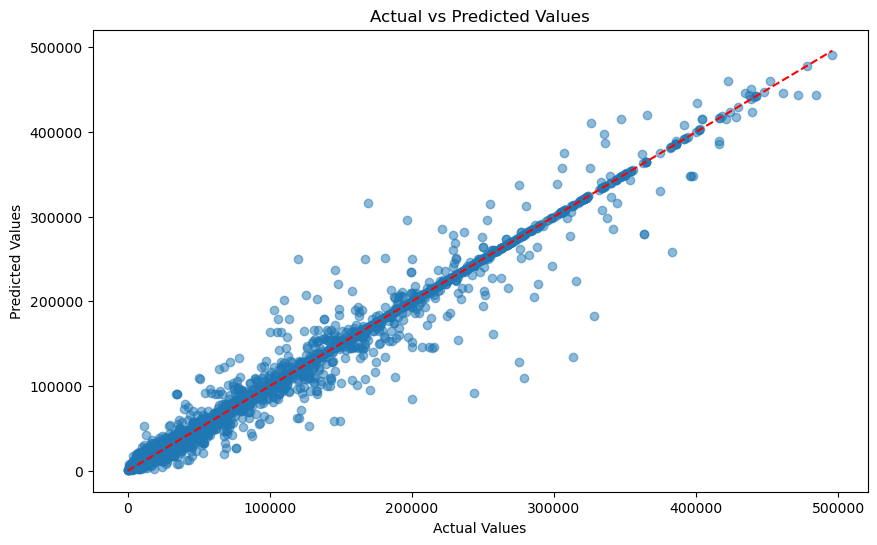

In [191]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


# Predictive System

In [194]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

# Example input features
Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37
Area = 'Albania'
Item = 'Maize'

# Make the prediction
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
print(result)


[36613.]


Predicts the crop yield based on the input features using the trained Decision Tree Regressor.

Parameters:

* Year (int): The year of the observation.
* average_rain_fall_mm_per_year (float): The average rainfall in mm per year.
* pesticides_tonnes (float): The amount of pesticides used in tonnes.
* avg_temp (float): The average temperature in Celsius.
* Area (str): The area/country of the observation.
* Item (str): The type of crop.

Returns:

* float: The predicted crop yield.

**NOTE:** The input values can be changes to make predictions for different scenarios.

In [202]:
#Adjust the input parameters as needed to predict yields for different scenarios.
result = prediction(2013, 657.0, 2550.07, 19.76, 'Zimbabwe', 'Sorghum')
print(result)

[3066.]


# Pickle Files

**Pickle is a Python module used for serializing and deserializing Python objects. Serialization, also known as "pickling," is the process of converting a Python object into a byte stream, allowing it to be saved to a file or transmitted over a network. Deserialization, or "unpickling," is the reverse process, where the byte stream is converted back into a Python object.**

*Serializing the trained Decision Tree Regressor model and the preprocessing pipeline using the *pickle* module. This will allow you to save the trained model and preprocessing pipeline to disk, and later load them for making predictions without having to retrain the model.*

In [205]:
#The pickle module is used for serializing and deserializing Python objects.
import pickle

# Serialize the trained Decision Tree Regressor model to a file named 'dtr.pkl'
pickle.dump(dtr, open('dtr.pkl', 'wb'))

# Serialize the preprocessing pipeline to a file named 'preprocessor.pkl'
pickle.dump(preprocesser, open('preprocessor.pkl', 'wb'))


In [209]:
import sklearn
print(sklearn.__version__)

1.5.1


By installing scikit-learn in your project, you equip yourself with powerful tools to implement machine learning algorithms, preprocess data, evaluate models, and streamline your workflow, ultimately enhancing your ability to analyze data and draw insights effectively.

# Residuals Plot

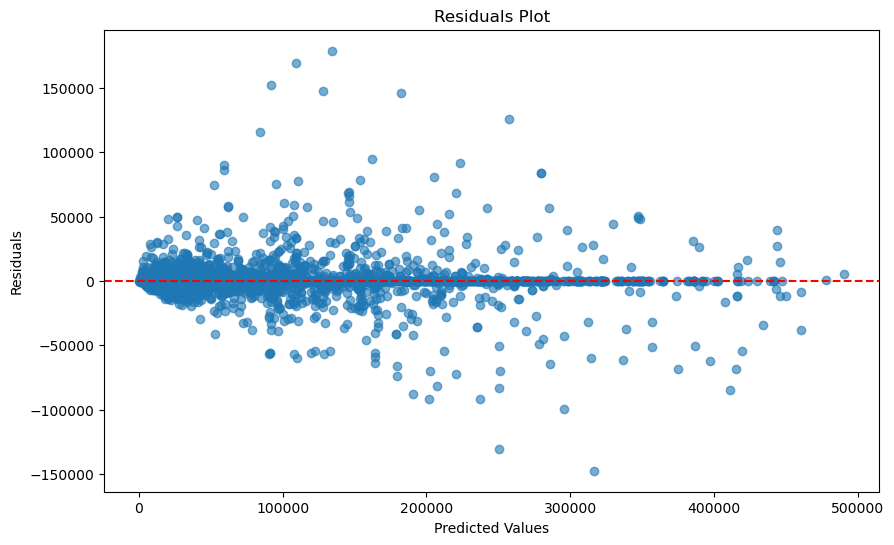

In [218]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# Learning Curves

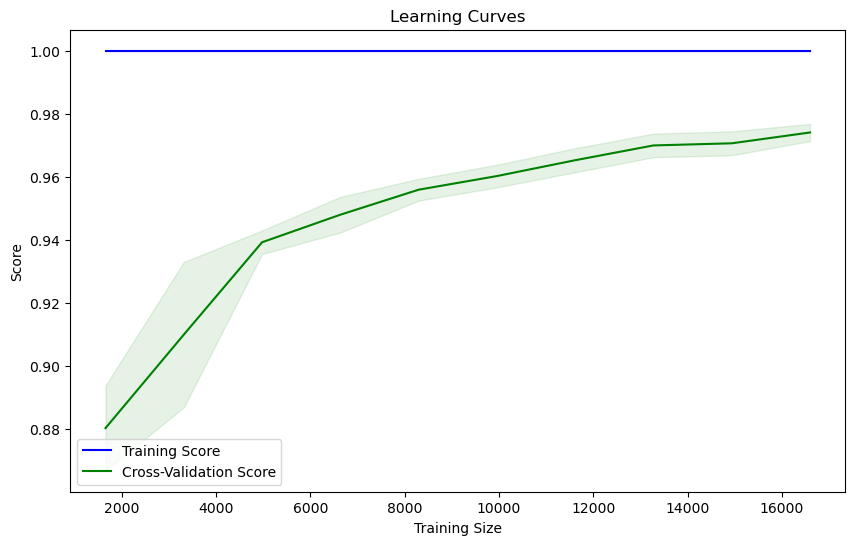

In [222]:
from sklearn.model_selection import learning_curve

# Get learning curves
train_sizes, train_scores, test_scores = learning_curve(dtr, X_train_dummy, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()


# Target Variable Distribution Histogram

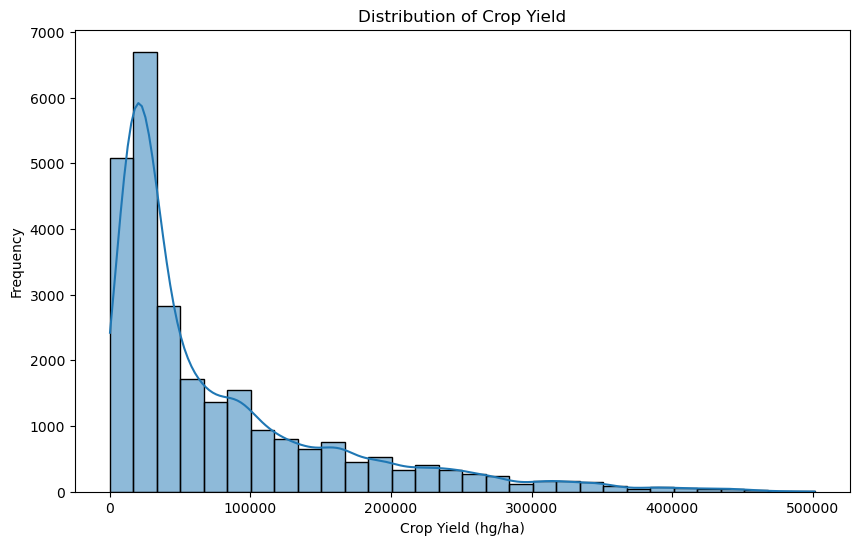

In [224]:
# Create a histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['hg/ha_yield'], bins=30, kde=True)
plt.title('Distribution of Crop Yield')
plt.xlabel('Crop Yield (hg/ha)')
plt.ylabel('Frequency')
plt.show()
